# Data Cleaning

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid",
              font_scale=1.2, # This scales the fonts slightly higher
              )
# And we're going to remove the top and right axis lines
plt.rc("axes.spines", top=False, right=False)

# load file
df = pd.read_csv('../../data/raw/pollution_2000_2021.csv')
df.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000,608699.000000
mean,2011.040529,6.508670,15.737176,0.028477,0.038903,10.773469,39.112517,0.337258,0.476798,5.971042,5.377387,1.523358,4.210271,8.851891,5.568708,11.738067,23.610711,11.606845,22.124240
std,6.122558,3.310633,8.806949,0.012218,0.015031,3.308152,22.480864,0.282958,0.446321,7.739380,5.142873,2.495094,7.983793,6.774720,10.736164,9.083091,15.412489,7.881014,14.610125
min,2000.000000,1.000000,1.000000,-0.000706,0.000000,7.000000,0.000000,-0.437500,-0.400000,0.000000,0.000000,-2.508333,-2.300000,0.000000,0.000000,-4.629167,-4.400000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,0.019647,0.029000,9.000000,27.000000,0.179167,0.200000,0.000000,2.000000,0.187500,0.600000,3.000000,0.000000,4.978261,11.200000,5.000000,10.000000
50%,2012.000000,7.000000,16.000000,0.028235,0.038000,10.000000,35.000000,0.262500,0.400000,2.000000,5.000000,0.666667,1.700000,8.000000,1.000000,9.541667,21.800000,9.000000,20.000000
75%,2016.000000,9.000000,23.000000,0.036765,0.048000,11.000000,44.000000,0.420833,0.600000,9.000000,7.000000,1.772727,4.000000,13.000000,6.000000,16.304348,33.700000,20.000000,31.000000
max,2021.000000,12.000000,31.000000,0.107353,0.140000,23.000000,237.000000,7.508333,15.500000,23.000000,201.000000,321.625000,351.000000,23.000000,200.000000,140.650000,269.200000,23.000000,133.000000


In [94]:
df.describe(exclude='number')

,Date,Address,State,County,City
count,608699,608699,608699,608699,608699
unique,7975,216,48,136,148
top,2019-12-04,"5888 MISSION BLVD., RUBIDOUX",California,Los Angeles,Not in a city
freq,104,12867,187403,30891,50716


In [95]:
df1 = df.drop(columns=['O3 1st Max Value', 'O3 1st Max Hour', 'CO 1st Max Value', 'CO 1st Max Hour', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'NO2 1st Max Value', 'NO2 1st Max Hour'])
df1.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 AQI,CO Mean,CO AQI,SO2 Mean,SO2 AQI,NO2 Mean,NO2 AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,37,0.878947,25.0,3.000000,13.0,19.041667,46
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,30,1.066667,26.0,1.958333,4.0,22.958333,34
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,15,1.762500,28.0,5.250000,16.0,38.125000,48
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,31,1.829167,34.0,7.083333,23.0,40.260870,72
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,11,2.700000,42.0,8.708333,21.0,48.450000,58


# Data Visualization

Since higher the AQI, higher the air pollution level, I would use the sum of AQI for each pollutant to compare the air pollution level.

In [96]:
# create a column 'Total AQI' that sums up AQI for each pollutant
df1['Total AQI'] = df1['O3 AQI'] + df1['CO AQI'] + df1['SO2 AQI'] + df1['NO2 AQI']
df1.head()

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 AQI,CO Mean,CO AQI,SO2 Mean,SO2 AQI,NO2 Mean,NO2 AQI,Total AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,37,0.878947,25.0,3.000000,13.0,19.041667,46,121.0
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,30,1.066667,26.0,1.958333,4.0,22.958333,34,94.0
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,15,1.762500,28.0,5.250000,16.0,38.125000,48,107.0
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,31,1.829167,34.0,7.083333,23.0,40.260870,72,160.0
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,11,2.700000,42.0,8.708333,21.0,48.450000,58,132.0


In [97]:
# drop the uneccesarry columns
top10clean = df1.drop(columns=['O3 Mean', 'CO Mean', 'SO2 Mean', 'NO2 Mean'])
top10clean.head()

,Date,Year,Month,Day,Address,State,County,City,O3 AQI,CO AQI,SO2 AQI,NO2 AQI,Total AQI
0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,37,25.0,13.0,46,121.0
1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,30,26.0,4.0,34,94.0
2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,15,28.0,16.0,48,107.0
3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,31,34.0,23.0,72,160.0
4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,11,42.0,21.0,58,132.0


Create the mean total AQI for each city (address)

In [98]:
top10clean = top10clean.groupby('City')[['Total AQI']].mean().sort_values(by='Total AQI').reset_index().head(10)
top10clean

,City,Total AQI
0,Eureka,36.567639
1,Presque Isle,37.698024
2,Vandenberg Air Force Base,42.985846
3,Londonderry,44.228220
4,Grantsville,44.726630
5,Bismarck,46.016949
6,Lompoc,46.602039
7,Cornwall,47.310956
8,Riverton,47.440922
9,Waco,48.797854


## Plot of Top 10 Cleanest Cities

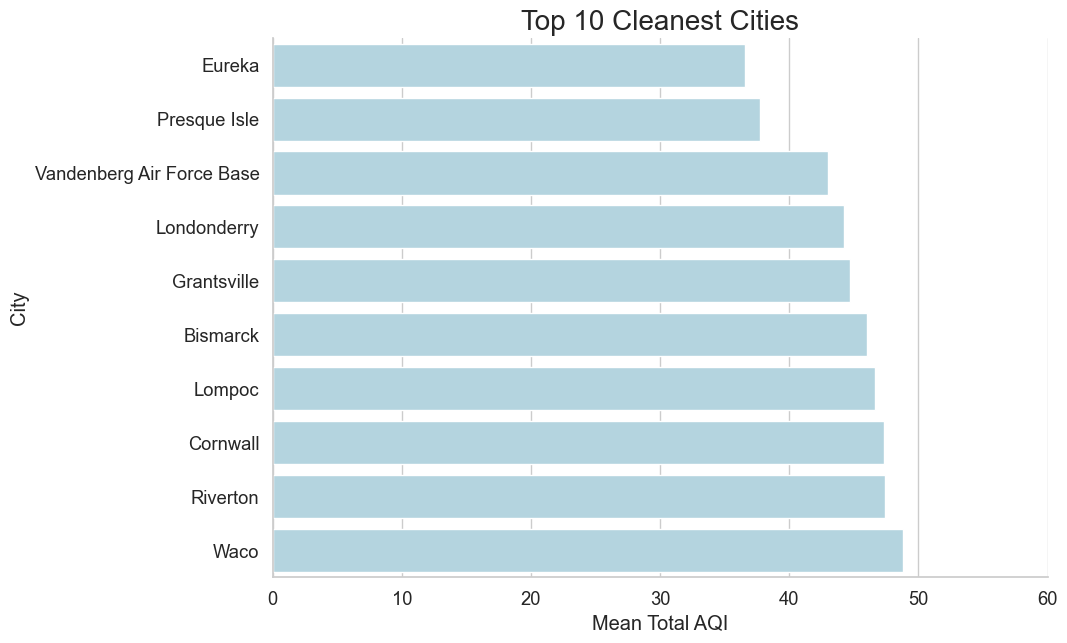

In [127]:
# create a plot
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Total AQI', y='City', data=top10clean, color='lightblue')
ax.set_xlim(0, 60)
ax.set_title('Top 10 Cleanest Cities', size=20)
plt.xlabel("Mean Total AQI")

# save the barchart into the graphs folder
plt.savefig('../graphs/top10cleanest.png', bbox_inches='tight')
plt.show()